# Prueba Intertrimestral

**Nombre:** María

**Apellidos:** Oliva Calero

**Tiempo de la prueba: 2 Horas**

**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos

**Fecha:** 18 de octubre de 2023

**Instrucciones:**

- Escribe código limpio y autoexplicativo.

- Se eliminará 0.5 puntos por usar Seaborn o Matplotlib.

- Se pueden utilizar los materiales de clase.

- Se puede utilizar internet para búsqueda de dudas y documentación.

- No se puede utilizar ningún tipo de LLM.

- No se puede utilizar mensajería instantánea.

- Sube tus resultados a tu repositorio de Github.

- Imprime una versión en PDF en A3 y Portrait del notebook.

- Envialo tus resultados a dmartincorral@icai.comillas.edu adjuntando el PDF y la url del notebook subido al repositorio de Github.


## Inicialización de librerías

Carga aquí todas las librerías que vayas a utilizar.

In [91]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score, accuracy_score)
from sklearn.linear_model import ElasticNet
from sklearn.cluster import KMeans
import numpy as np

import seaborn as sns
import plotly as pt

## Ejercicio 1 (2 puntos):

a) Crea una función que calcule y devuelva el factorial de un número entero. **(0.6 puntos)**

b) Crea una función que verifique si un número es primo o no. **(0.6 puntos)**

c) Muestra en un dataframe los 50 primeros números positivos, si es primo y su factorial utilizando las funciones anteriores. **(0.6 puntos)**

d) ¿Cómo se podría programar en una clase las tres operaciones anteriores? **(0.2 puntos)**

In [16]:
#a
def fact(numero):
  factorial = 1
  i = 1
  while (i <= numero):
    factorial = factorial * i
    i = i + 1
  return factorial

#b

def primo(numero):
  for n in range(2, numero):
      if numero % n == 0:
          return False
  return True

#c
data = []
for numero in range(1, 51):
    data.append([numero, primo(numero), fact(numero)])
df = pd.DataFrame(data, columns=["Número", "Primo", "Factorial"])
df.set_index("Número")
df.head()


class operaciones():

    def __init__(self,a):
        self.numero=a

    def fact(self):
      factorial = 1
      i = 1
      while (i <= self.numero):
        factorial = factorial * i
        i = i + 1
      return factorial

    def primo(self):
      for n in range(2, self.numero):
          if numero % n == 0:
              return False
      return True

    def dataframe(self):
      data = []
      for numero in range(1, self.numero):
          data.append([numero, primo(numero), fact(numero)])
      df = pd.DataFrame(data, columns=["Número", "Primo", "Factorial"])
      df.set_index("Número")
      return df





,Número,Primo,Factorial
0,1,True,1
1,2,True,2
2,3,True,6
3,4,False,24
4,5,True,120


## Ejercicio 2 (4 puntos):

a) Extrae de sklearn el conjunto de datos __California Housing dataset__
 y transfórmalo a dataframe de pandas **(0.25 puntos)**

b) Construye una función que muestra la estructura del dataset, el número de NAs, tipos de variables y estadísticas básicas de cada una de las variables. **(0.5 puntos)**

c) Construye una __Regresión lineal__ y un __Random forest__ que predigan el __Median house value__ según los datos disponibles. **(0.75 puntos)**

d) Visualiza cuales son las variables (coeficientes) más importantes en cada uno de los modelos. **(1.25 puntos)**

e) Decide a través de las métricas que consideres oportunas, cuál de los dos modelos es mejor, por qué y explica el proceso que has realizado para responder en los puntos anteriores. **(1.25 puntos)**

In [54]:
#a

from sklearn.datasets import fetch_california_housing

cali= fetch_california_housing(as_frame=True)

df = pd.DataFrame(data = cali['data'], columns = cali["feature_names"])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
#b
def info(df):
    print("Estructura:")
    print(df.head(5))  # pinto los 5 primeros valores para que se vea la estructura
    print("______________")
    print("\nNúmero de NAs por columna:")
    print(df.isna().sum())
    print("______________")
    print("\nTipos de variables:")
    print(df.dtypes)
    print("______________")
    print("\nEstadísticas básicas:")
    print(df.describe())

info(df)

Estructura:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
______________

Número de NAs por columna:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
______________

Tipos de variables:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
______________

Estadísticas bá

In [56]:
#c

# Agregamos la variable objetivo
df["target"] = cali["target"]
df

# Dividir train-test
X = cali["data"].copy()
y = cali["target"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [64]:
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [69]:
predictions = reg.predict(X_test)
predictions_train = reg.predict(X_train)

# Metricas de evaluación
rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

reg_coef = reg.score(X_train,y_train)
print(reg_coef)

El RMSE de train del modelo es: 0.7265293808219301
El MAE de train del modelo es: 0.5330981590557595
El MAPE de train del modelo es: 31.74009324464936 %

El RMSE de test del modelo es: 0.7187326821064438
El MAE de test del modelo es: 0.528816003284153
El MAPE de test del modelo es: 31.780348070932174 %
0.604714940991568


In [59]:
#Random Forest
rf = RandomForestRegressor(n_estimators=50, random_state=3)

# Entrenar el modelo en el conjunto de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)


In [59]:


plt.figure(figsize=(10, 6))
plt.bar(range(len(reg_coefs), reg_coefs)
plt.xticks(range(len(coeficientes), labels=nombre_de_tus_variables)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Importancia de las variables en el modelo de regresión lineal')
plt.show()

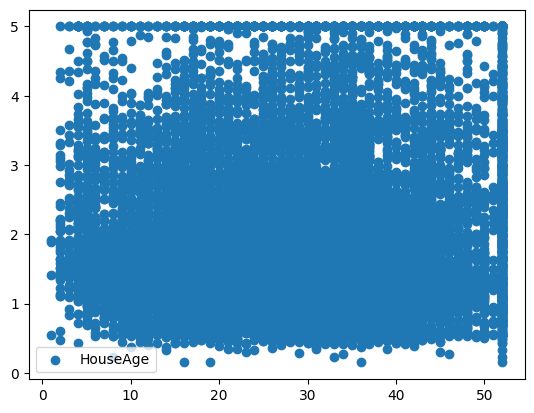

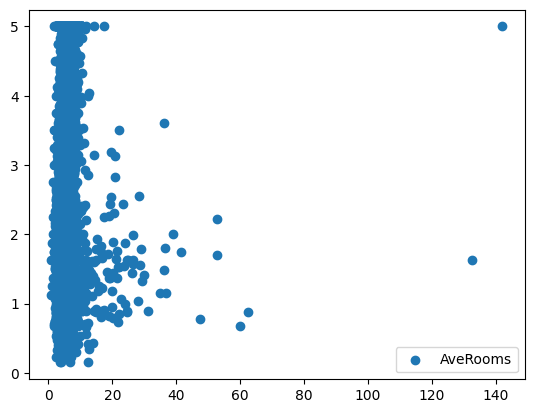

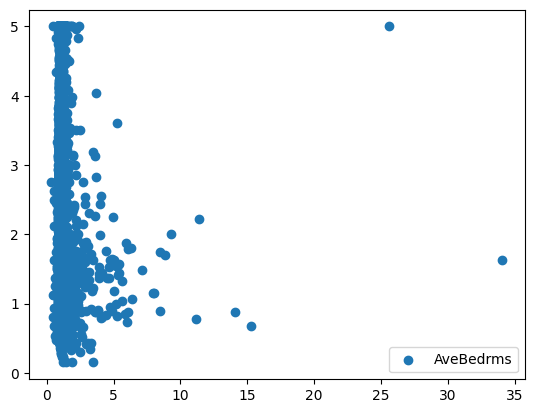

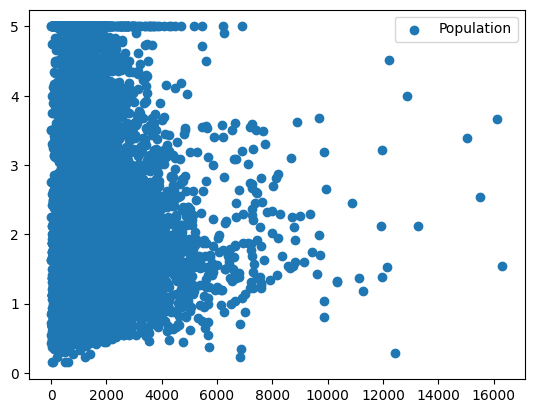

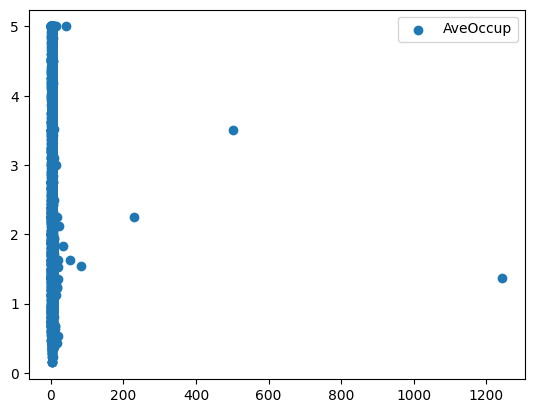

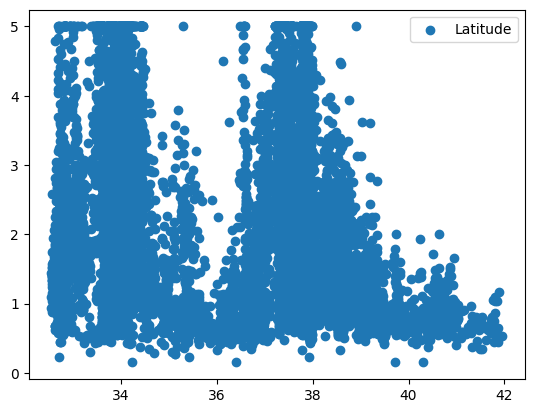

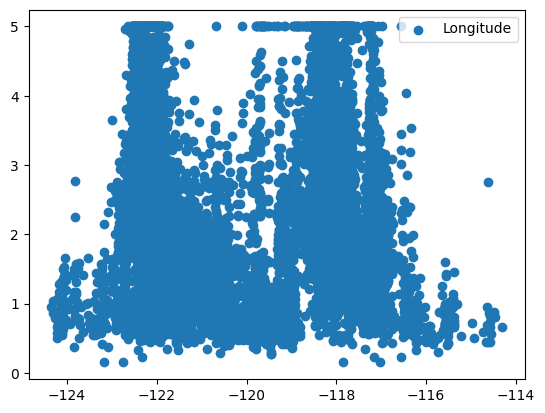

In [74]:
y = y_train

for column in X_train.columns[1:]:
    x = X_train[column]  # Dependent variable
    plt.figure()
    plt.scatter(x, y, label=column)
    plt.legend()
    plt.show()



## Ejercicio 3 (4 puntos):


*Consideremos* el dataset que contiene __The Most Streamed Spotify Songs 2023__ que se encuentra en el respositorio.

Información de las variables:

- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- vartist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- release_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

Para las respuestas b, c, d, e, f y g es imperativo acompañarlas respuestas con una visualización.

a) Lee el fichero en formato dataframe, aplica la función del ejercicio 2.b, elimina NAs y convierte a integer si fuera necesario. **(0.25 puntos)**

b) ¿Cuántos artistas únicos hay? **(0.25 puntos)**

c) ¿Cuál es la distribución de reproducciones? **(0.5 puntos)**

d) ¿Existe una diferencia signitificativa en las reproducciones entre las canciones de un solo artista y las de más de uno? **(0.5 puntos)**

e) ¿Cuáles son las propiedades de una canción que mejor correlan con el número de reproducciones de una canción? **(0.5 puntos)**

f) ¿Cuáles son las variables que mejor predicen las canciones que están por encima el percentil 50? **(1 puntos)**

*Nota: Crea una variable binaria (Hit/No Hit) en base a 3.c, crea una regresión logística y visualiza sus coeficientes.*

g) Agrupa los 4 gráficos realizados en uno solo y haz una recomendación a un sello discográfico para producir un nuevo hit. **(1 puntos)**


In [110]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023 (1).csv


In [111]:
df = pd.read_csv("spotify-2023.csv", encoding = 'ISO-8859-1')
info(df)

Estructura:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703   

In [118]:
df = df.dropna()
streams = []
df['streams']=pd.to_numeric(df['streams'], errors="coerce")


In [119]:
artists=df["artist(s)_name"].unique()
print(len(artists))


571


In [120]:
import plotly.express as px
fig = px.histogram(df, x="streams")
fig.show()

In [121]:
df.groupby("artist_count").mean()

<ipython-input-121-6ddd34a3bf61>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,,,,,,,,,,,,,,,,,
1,2017.500000,5.959514,13.599190,5375.232794,11.064777,5.063944e+08,59.589069,50.080972,2.089069,123.736842,64.461538,48.949393,62.459514,28.070850,2.362348,17.611336,9.192308
2,2020.580357,5.995536,14.580357,4067.602679,13.651786,4.388571e+08,62.866071,54.441964,3.424107,121.754464,71.633929,53.950893,67.066964,25.026786,0.508929,18.941964,12.495536
3,2017.946667,6.333333,11.880000,4492.466667,12.653333,3.839797e+08,60.586667,38.600000,2.226667,117.320000,71.320000,54.840000,67.106667,20.373333,0.506667,19.093333,12.973333
4,2018.357143,6.142857,12.428571,3571.571429,4.071429,3.201655e+08,60.357143,18.785714,2.285714,133.142857,75.571429,57.714286,66.928571,21.571429,0.000000,23.785714,11.928571
5,2022.600000,6.800000,11.200000,1028.400000,7.600000,1.448082e+08,17.000000,25.200000,1.000000,98.000000,77.800000,62.000000,71.800000,21.800000,10.200000,11.600000,10.600000
6,2022.000000,8.666667,19.666667,395.333333,2.666667,8.746645e+07,22.666667,65.333333,0.000000,108.666667,83.333333,66.666667,75.333333,9.666667,0.000000,19.000000,8.666667
7,2022.000000,1.000000,14.000000,1034.000000,1.000000,2.454002e+08,19.000000,5.000000,0.000000,174.000000,67.000000,74.000000,75.000000,44.000000,0.000000,7.000000,30.000000
8,2021.000000,8.000000,12.000000,1560.000000,0.000000,2.233199e+08,72.000000,0.000000,0.000000,84.000000,56.000000,61.000000,76.000000,10.000000,0.000000,14.000000,11.000000


In [128]:
df["single_artist"] = df.apply(lambda row: True if row["artist_count"] ==1 else False, axis = 1)

In [137]:
df.groupby("single_artist").mean()
#si que existe diferencia significativa



<ipython-input-137-e1b1999efbb9>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
single_artist,,,,,,,,,,,,,,,,,,
False,2.436533,2019.922601,6.108359,13.845201,4046.445820,12.727554,4.118884e+08,61.037152,48.544892,3.006192,120.773994,71.873065,54.647059,67.272446,23.616099,0.628483,19.021672,12.566563
True,1.000000,2017.500000,5.959514,13.599190,5375.232794,11.064777,5.063944e+08,59.589069,50.080972,2.089069,123.736842,64.461538,48.949393,62.459514,28.070850,2.362348,17.611336,9.192308


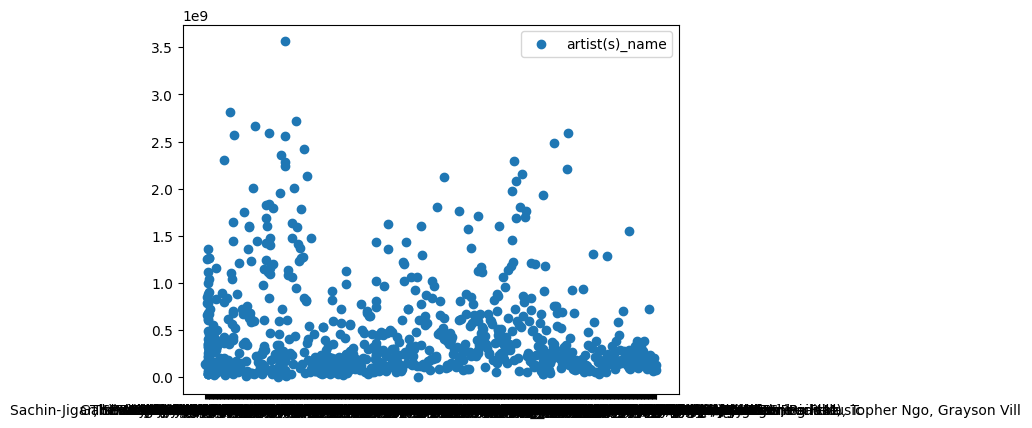

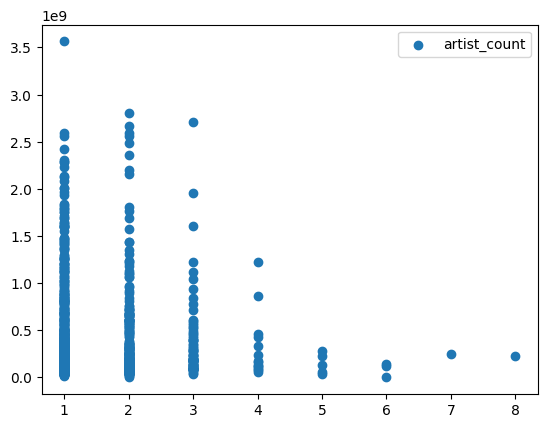

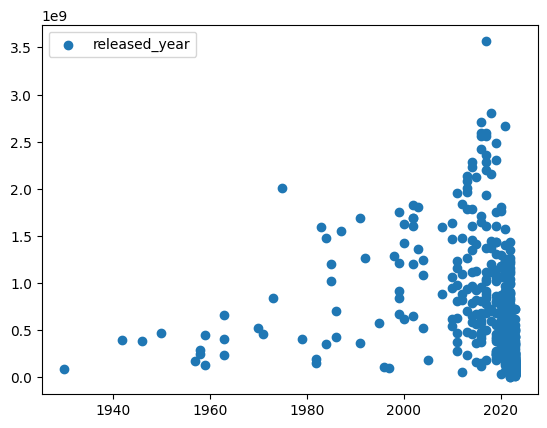

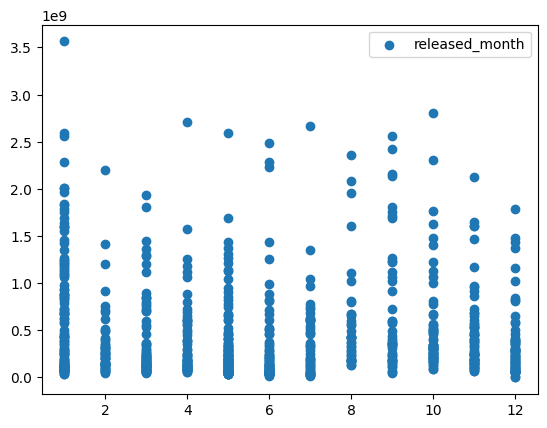

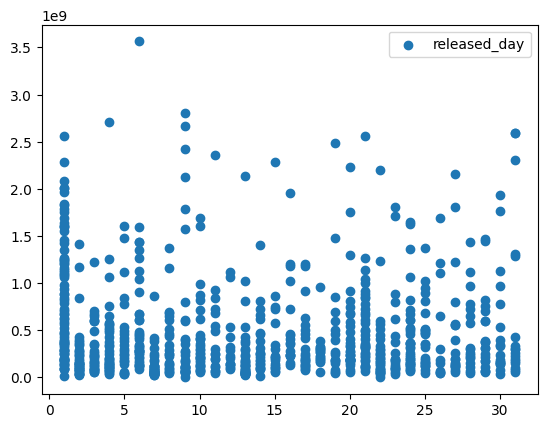

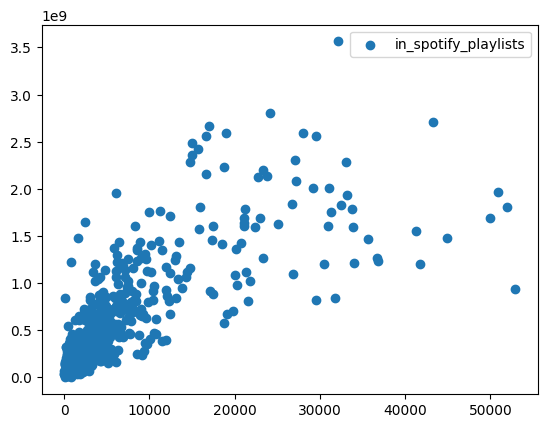

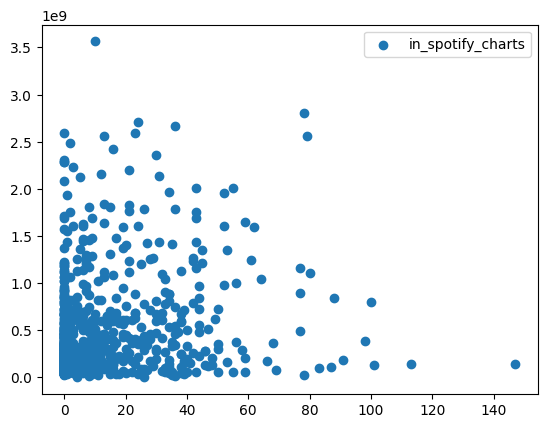

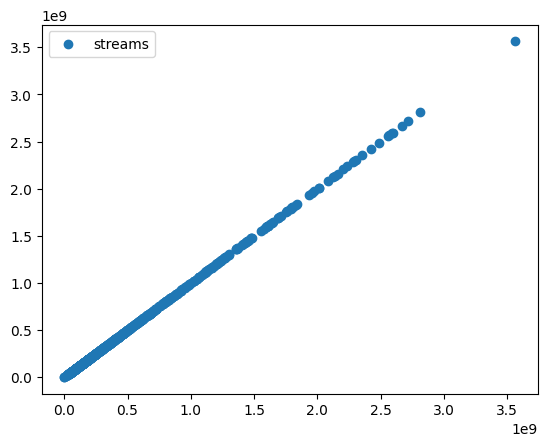

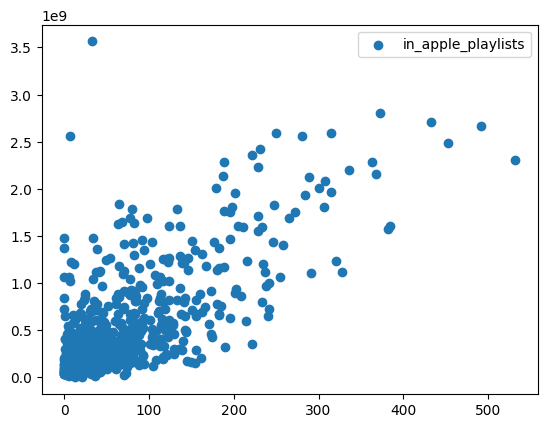

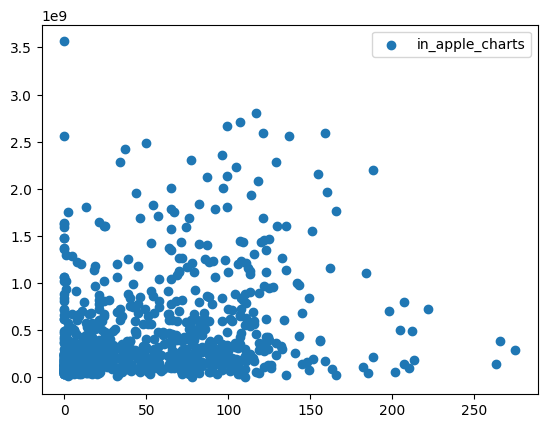

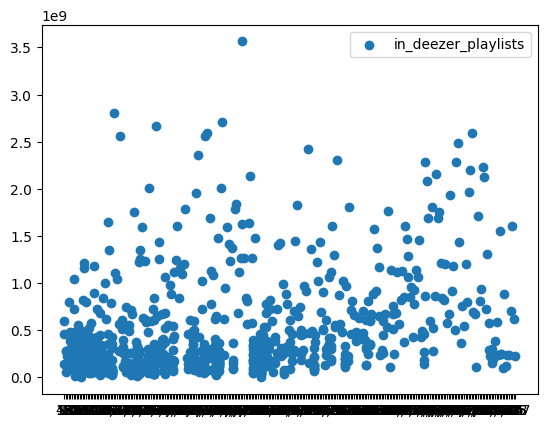

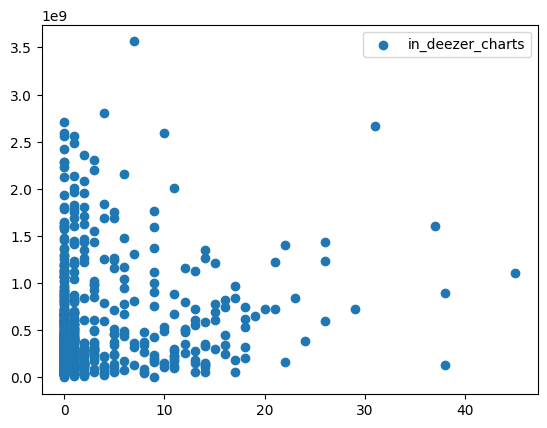

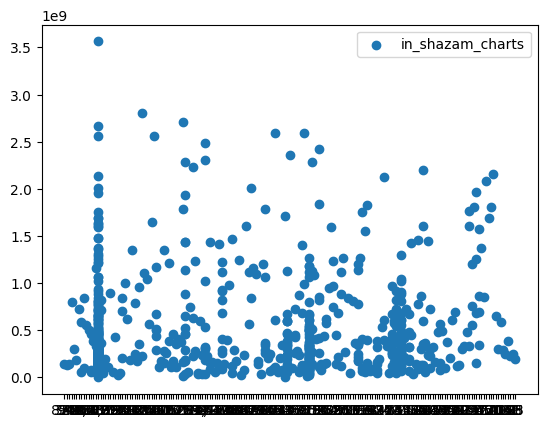

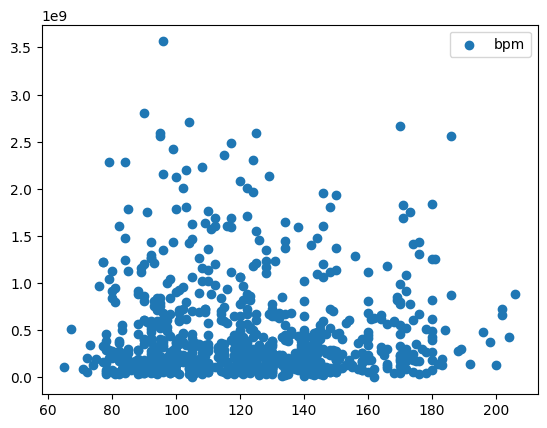

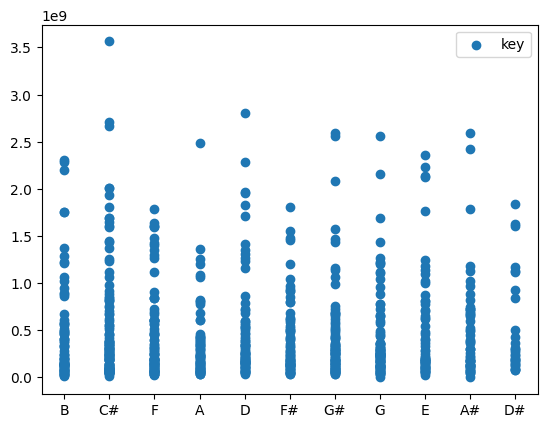

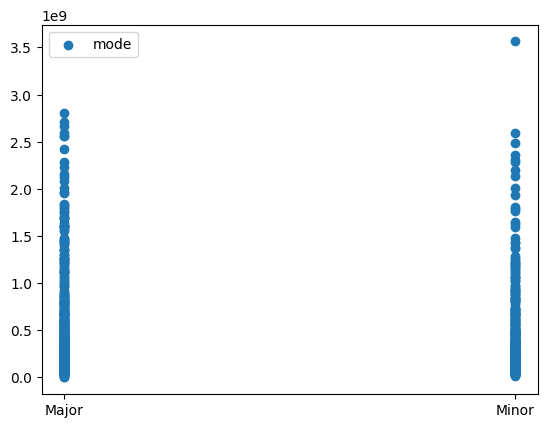

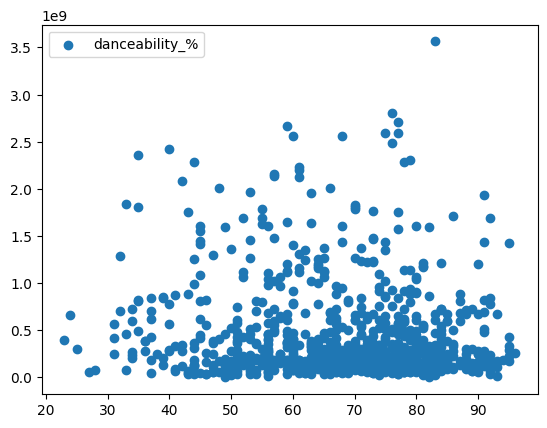

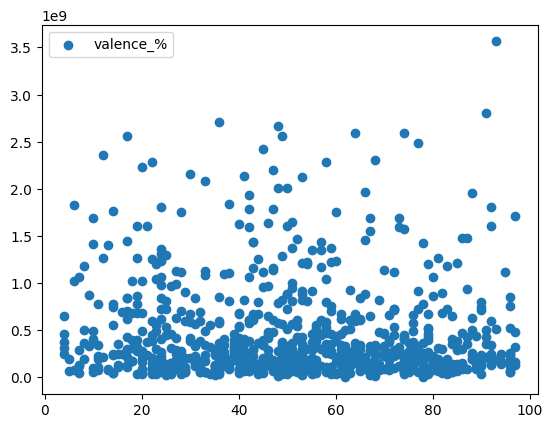

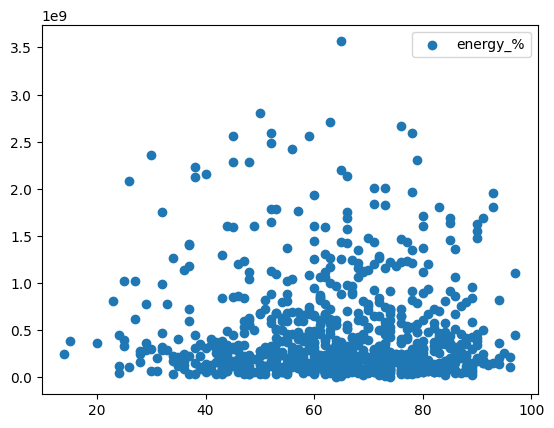

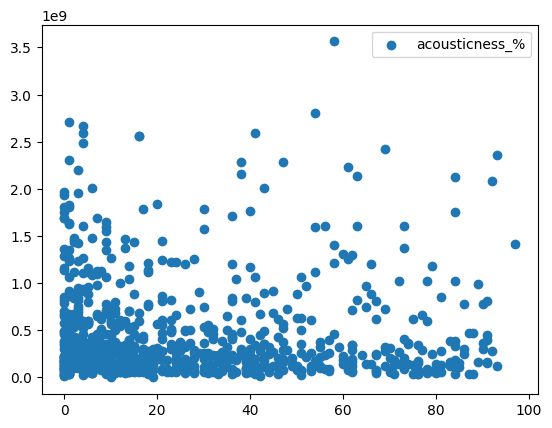

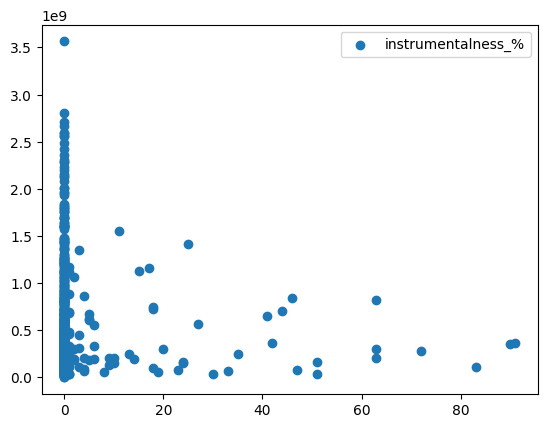

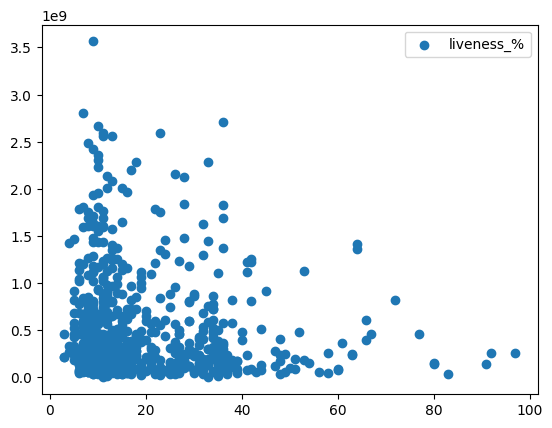

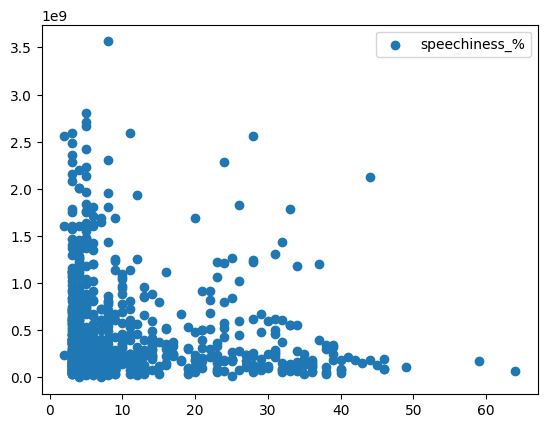

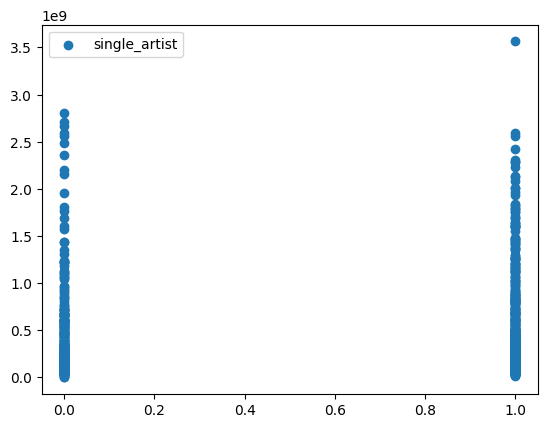

In [143]:
y = df["streams"]

for column in df.columns[1:]:
    x = df[column]  # Dependent variable
    plt.figure()
    plt.scatter(x, y, label=column)
    plt.legend()
    plt.show()

# las variables mas significativas que correlan con streams son in_spotify_playlists, release_year, artist_count y in_apple_playlists

In [144]:
df.corr()

<ipython-input-144-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,single_artist
artist_count,1.000000,0.073564,0.033857,-0.014762,-0.085226,-0.008570,-0.109760,-0.017024,-0.075271,0.020585,-0.058844,0.214078,0.123650,0.137530,-0.094704,-0.061269,0.034354,0.131486,-0.802076
released_year,0.073564,1.000000,0.076439,0.166377,-0.390729,0.068679,-0.242726,-0.201474,0.003479,0.095741,-0.011570,0.215032,-0.047643,0.078886,-0.133224,-0.023958,0.008489,0.129887,-0.109444
released_month,0.033857,0.076439,1.000000,0.057784,-0.122407,-0.050186,-0.046041,-0.034029,-0.017813,0.006942,-0.049400,-0.054808,-0.110355,-0.086897,0.055046,0.035481,0.001329,0.042127,-0.020383
released_day,-0.014762,0.166377,0.057784,1.000000,-0.107616,0.016068,-0.025116,-0.011916,0.007727,0.055426,-0.033394,0.084244,0.062751,0.047318,0.000785,0.023040,-0.011094,-0.014602,-0.012942
in_spotify_playlists,-0.085226,-0.390729,-0.122407,-0.107616,1.000000,0.141343,0.780404,0.688316,0.215676,0.101283,-0.034483,-0.096981,-0.029823,0.035875,-0.064633,-0.024570,-0.051973,-0.077610,0.083977
in_spotify_charts,-0.008570,0.068679,-0.050186,0.016068,0.141343,1.000000,0.214034,0.208202,0.556804,0.566161,0.028830,0.051338,0.050040,0.104963,-0.072853,-0.005814,-0.026582,-0.094102,-0.043694
streams,-0.109760,-0.242726,-0.046041,-0.025116,0.780404,0.214034,1.000000,0.735321,0.269137,0.184329,-0.025694,-0.093268,-0.051014,-0.036499,-0.005751,-0.033039,-0.056664,-0.099968,0.088400
in_apple_playlists,-0.017024,-0.201474,-0.034029,-0.011916,0.688316,0.208202,0.735321,1.000000,0.364761,0.326815,0.005558,-0.012586,0.041253,0.039992,-0.070965,-0.054372,-0.064986,-0.097647,-0.009455
in_apple_charts,-0.075271,0.003479,-0.017813,0.007727,0.215676,0.556804,0.269137,0.364761,1.000000,0.366581,0.027057,-0.026138,0.042941,0.129354,-0.096781,-0.000381,-0.007161,-0.146472,0.015160
in_deezer_charts,0.020585,0.095741,0.006942,0.055426,0.101283,0.566161,0.184329,0.326815,0.366581,1.000000,0.021730,0.081414,0.073169,0.104350,-0.035135,0.003503,0.003650,-0.081523,-0.083135
